# Estimate Penetration From Bologna Data

In [11]:
from collections import defaultdict
from datetime import datetime
import os
import polars as pl
import pandas as pd
import geopandas as gpd
from GeographyFunctions import FilterGeoDataFrameWithBoundingBox
from shapely.geometry import Point, LineString, Polygon
import matplotlib.pyplot as plt
import numpy as np
def FilterGeoDataFrameWithBoundingBox(gdf,Bbox):
    """
    @param gdf: GeoDataFrame
    @param lat_min: Float (Latitude Minimum)
    @param lat_max: Float (Latitude Maximum)
    @param lon_min: Float (Longitude Minimum)
    @param lon_max: Float (Longitude Maximum)
    @return gdf: GeoDataFrame
    """
    minx, miny, maxx, maxy = Bbox
    if isinstance(gdf.geometry[0],Point):
        filtered_gdf = gdf.cx[minx:maxx, miny:maxy]
    elif isinstance(gdf.geometry[0],LineString):
        filtered_gdf = gdf.cx[minx:maxx, miny:maxy]
    elif isinstance(gdf.geometry[0],Polygon):
        filtered_gdf = gdf.cx[minx:maxx, miny:maxy]
    return filtered_gdf
def GetTimeRanges(time_ranges, base_date):
    time_range_to_datetime = defaultdict(tuple)
    for time_range in time_ranges:
        start_time, end_time = time_range.split('-')
        if end_time != '24:00':
            start_datetime = datetime.strptime(f"{base_date} {start_time}", "%Y-%m-%d %H:%M")
            time_range_to_datetime[time_range] = start_datetime.strftime("%Y-%m-%d %H:%M:%S")
    return time_range_to_datetime
def PolyCid2NameFromFilePro(FilePro):#poly_cid  node_front_cid  node_tail_cid  length  lvl_ps  ?  ?  ?  speed  ?  name
    PolyCid2Name = defaultdict(str)
    with open(FilePro, 'r') as file:
        header = file.readline().strip().split()
    
        # Iterate over each line in the file
        for line in file:
            # Split the line into values
            values = line.strip().split()
            
            # Assign the values to respective variables
            poly_cid = int(values[0])
            node_front_cid = int(values[1])
            node_tail_cid = int(values[2])
            length = float(values[3])
            lvl_ps = float(values[4])
            unknown1 = int(values[5])
            unknown2 = int(values[6])
            unknown3 = int(values[7])
            speed = float(values[8])
            unknown4 = int(values[9])
            name = ' '.join(values[10:])  # Join the remaining values as the name
            PolyCid2Name[poly_cid] = name
    PolyCid2Name = Substitute_WithSpacePolyCid2Name(PolyCid2Name)

    return PolyCid2Name 
def Substitute_WithSpacePolyCid2Name(PolyCid2Name):
    PolyCid2Name_Space = defaultdict(str)
    for key in PolyCid2Name:
        PolyCid2Name_Space[key] = PolyCid2Name[key].replace('_', ' ')
    return PolyCid2Name_Space

def GetTimeRangesFromDfOpenData(DfTrafficOpenData):
    TimeRanges = []
    for Col in DfTrafficOpenData.columns:
        if ":" in Col:
            TimeRanges.append(Col)
    return TimeRanges

def DiscardColumnsSpeedGdfRoads(GdfRoads):
    Columns2Accept = []
    for Col in GdfRoads.columns:
        if 'Speed' not in Col:
            Columns2Accept.append(Col)
    GdfRoads = GdfRoads[Columns2Accept]
    return GdfRoads

def GenerateTimeRanges(DfTrafficOpenData):
    """
        Generate the Time Ranges from the DataFrame of the Traffic Open Data ["00:00-01:00",...]
        These are the columns of the OpenData that need to be mapped to time of the format of the other otuput.
        @param DfTrafficOpenData: DataFrame with the Traffic Open Data
        @return TimeRanges: List of Time Ranges
    """
    TimeRanges = GetTimeRangesFromDfOpenData(DfTrafficOpenData)
    Column2ConsiderGdfTrafficOpenData = TimeRanges.copy()
    Column2ConsiderGdfTrafficOpenData.append("data")
    Column2ConsiderGdfTrafficOpenData.append("geometry")
    return Column2ConsiderGdfTrafficOpenData,TimeRanges


def OpenDataFrameSpireAndTransformGeoData(DirOpenDataBologna,Days,StrFile = "rilevazione-flusso-veicoli-tramite-spire-anno-2022.csv"):
    """
        Open the DataFrame of the Traffic Open Data and transform it to a GeoDataFrame
        @param DirOpenDataBologna: Directory where the Open Data is stored
        @param Days: List of days to consider
        @return GdfTrafficOpenData: GeoDataFrame with the traffic data
    """
    DfTrafficOpenData = pl.read_csv(os.path.join(DirOpenDataBologna, StrFile),separator=';')
    DfTrafficOpenData = DfTrafficOpenData.filter(pl.col("data").is_in(Days))
    DfTrafficOpenData_pd = DfTrafficOpenData.to_pandas()
    GdfTrafficOpenData = gpd.GeoDataFrame(
        DfTrafficOpenData_pd, geometry=gpd.points_from_xy(DfTrafficOpenData_pd["longitudine"], DfTrafficOpenData_pd["latitudine"]))
    GdfTrafficOpenData.set_crs(epsg=4326, inplace=True)
    Column2ConsiderGdfTrafficOpenData,TimeRanges = GenerateTimeRanges(DfTrafficOpenData)
    GdfTrafficOpenData = GdfTrafficOpenData[Column2ConsiderGdfTrafficOpenData]

    return GdfTrafficOpenData,Column2ConsiderGdfTrafficOpenData,TimeRanges

2022-01-31


2025-01-29 15:03:13,965 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-29 15:03:13,967 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


2022-07-01


2025-01-29 15:03:14,941 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-29 15:03:14,944 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


2022-08-05


2025-01-29 15:03:15,731 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-29 15:03:15,733 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


2022-11-11


2025-01-29 15:03:16,492 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-29 15:03:16,494 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


2022-12-30


2025-01-29 15:03:17,240 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-29 15:03:17,242 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


2022-12-31


2025-01-29 15:03:17,970 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-29 15:03:17,973 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


2023-01-01


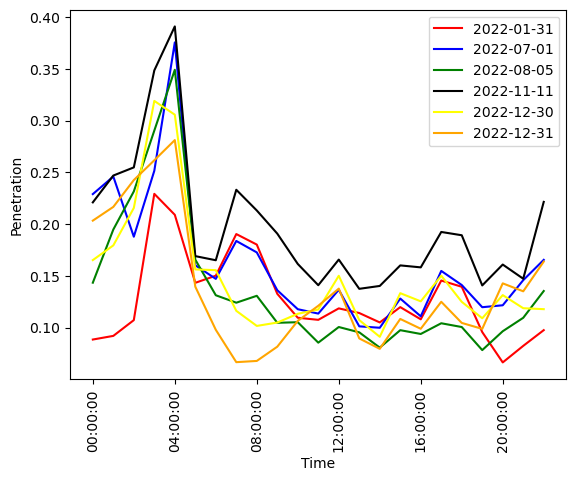

In [15]:

Days = ["2022-01-31","2022-07-01","2022-08-05","2022-11-11","2022-12-30","2022-12-31","2023-01-01","2023-03-18"] 
DirOpenDataBologna = "/home/aamad/codice/city-pro/bologna_mdt_detailed/carto"
FilePro = os.path.join(DirOpenDataBologna, "bologna_mdt_cleaned.pro")
# Open Data
GdfTrafficOpenData2022,Column2ConsiderGdfTrafficOpenData,TimeRanges = OpenDataFrameSpireAndTransformGeoData(DirOpenDataBologna,Days,StrFile = "rilevazione-flusso-veicoli-tramite-spire-anno-2022.csv")
# GdfTrafficOpenData2023,_,_ = OpenDataFrameSpireAndTransformGeoData(DirOpenDataBologna,Days,StrFile = "accuratezza-spire-anno-2023.csv")

Day = "2022-01-31"
#GdfRoads = gpd.read_file(f"/home/aamad/codice/city-pro/output/bologna_mdt_center/plots/{Day}/GeoJson_{Day}.geojson")
#GdfRoads.set_crs(epsg=4326, inplace=True)
lat_min = 44.487106
lat_max = 44.528131
lon_min = 11.293156
lon_max = 11.378143
Bbox = (lon_min, lon_max, lat_min, lat_max)
#GdfRoads = FilterGeoDataFrameWithBoundingBox(GdfRoads,Bbox)
fig,ax = plt.subplots()
Colors = ["red","blue","green","black","yellow","orange","purple","pink"]
Day2Color = dict(zip(Days,Colors))

for Day in Days:
    print(Day)
    TimeRange2Time = GetTimeRanges(TimeRanges,Day)
    TimedFluxes = pl.read_csv(f"/home/aamad/codice/city-pro/output/bologna_mdt_center/bologna_mdt_{Day}_{Day}_timed_fluxes.csv",separator=';')
    # Ensure both GeoDataFrames use the same CRS
    # Perform a spatial join to associate points with the nearest roads
    if "2023" in Day:
        break
    else:
        GdfTrafficOpenData = GdfTrafficOpenData2022.to_crs(epsg=3857)
    GdfRoads = GdfRoads.to_crs(epsg=3857)    
    GdfJoin = gpd.sjoin_nearest(GdfTrafficOpenData, GdfRoads, how='left', distance_col='distance')
    GdfJoin.set_crs(epsg=4326, inplace=True,allow_override=True)
    GdfJoin = DiscardColumnsSpeedGdfRoads(GdfJoin)
    PolyLid2VectorFluxes = {"average_penetration_tot": [], "average_penetration_FT": [], "average_penetration_TF": []}
    TimeHours = [Time.split(" ")[1] for Time in TimeRange2Time.values()]
    for TimeRange in TimeRange2Time.keys():
        Time = TimeRange2Time[TimeRange]
        FluxesPolysAtTime = TimedFluxes.filter(pl.col("time") == Time)
        DfJoinAtTime = pl.DataFrame(GdfJoin[[TimeRange, "poly_lid"]])
        DfJoinAtTime = DfJoinAtTime.filter(pl.col(TimeRange).is_not_null(),
                            pl.col(TimeRange).is_not_nan(),
                            pl.col(TimeRange) > 0)
        FluxesPolysAtTime = FluxesPolysAtTime.join(DfJoinAtTime,left_on="id",right_on="poly_lid")
        
        FluxesPolysAtTime = FluxesPolysAtTime.with_columns((pl.col("total_fluxes")/pl.col(TimeRange)).alias("penetration_total"),
                                                           (pl.col("total_fluxes")/pl.col(TimeRange)).alias("penetration_FT"),
                                                           (pl.col("total_fluxes")/pl.col(TimeRange)).alias("penetration_TF")
                                                           )
        FluxesPolysAtTime = FluxesPolysAtTime.filter(pl.col("penetration_total").is_not_null(),
                                                     pl.col("penetration_FT").is_not_null(),
                                                    pl.col("penetration_TF").is_not_null(),
                                                    pl.col("penetration_total").is_not_nan(),
                                                    pl.col("penetration_FT").is_not_nan(),
                                                    pl.col("penetration_TF").is_not_nan(),
                                                    pl.col("penetration_total") > 0,
                                                    pl.col("id")!=18952)
        PenetrationTotal = np.nanmean(FluxesPolysAtTime["penetration_total"].to_numpy())
        PenetrationFT = np.nanmean(FluxesPolysAtTime["penetration_FT"].to_numpy())
        PenetrationTF = np.nanmean(FluxesPolysAtTime["penetration_TF"].to_numpy())
        PolyLid2VectorFluxes["average_penetration_tot"].append(PenetrationTotal) 
        PolyLid2VectorFluxes["average_penetration_FT"].append(PenetrationFT)
        PolyLid2VectorFluxes["average_penetration_TF"].append(PenetrationTF) 
#    ax.plot(TimeHours,PolyLid2VectorFluxes["average_penetration_tot"],label=Day,color=Day2Color[Day])
    ax.plot(TimeHours,PolyLid2VectorFluxes["average_penetration_FT"],label=Day,color=Day2Color[Day])
#    ax.plot(TimeHours,PolyLid2VectorFluxes["average_penetration_TF"],label=Day,color=Day2Color[Day])
    ax.legend()
    ax.set_xticks(range(len(TimeHours))[::4])  # Set the ticks to correspond to the labels
    ax.set_xticklabels(TimeHours[::4], rotation=90)  # Set the labels with rotation    ax.set_title("Time Percorrence Distribution")
    ax.set_xlabel("Time")
    ax.set_ylabel("Penetration")
plt.savefig(f"/home/aamad/codice/city-pro/output/bologna_mdt_center/penetration.png")
plt.show()

In [17]:
m = GdfTrafficOpenData.explore()
GdfRoads["AtTimet"] = GdfRoads["poly_lid"].apply(lambda x: x in FluxesPolysAtTime["id"].to_list())
GdfRoads.to_crs(epsg=4326, inplace=True)
Columns2Accept = []
for Col in GdfRoads.columns:
    if 'Speed' not in Col:
        Columns2Accept.append(Col)
GdfRoads = GdfRoads[Columns2Accept]
GdfRoads.loc[GdfRoads["AtTimet"]].explore(m=m,color="red")

In [ ]:
GdfTrafficOpenData.explore()

In [61]:
TimedFluxes.with_columns(
    pl.col("id_local").map_dict(PolyCid2Name).alias("name")
)

/tmp/ipykernel_69598/2685030605.py:2: DeprecationWarning: `map_dict` is deprecated. It has been renamed to `replace`. The default behavior has changed to keep any values not present in the mapping unchanged. Pass `default=None` to keep existing behavior.
  pl.col("id_local").map_dict(PolyCid2Name).alias("name")


shape: (2_564_178, 11)
┌────────────┬────────┬──────────┬─────────────────┬───┬───────────┬───────────┬─────────┬──────┐
│ time       ┆ id     ┆ id_local ┆ nodeF           ┆ … ┆ n_traj_FT ┆ n_traj_TF ┆ cid     ┆ name │
│ ---        ┆ ---    ┆ ---      ┆ ---             ┆   ┆ ---       ┆ ---       ┆ ---     ┆ ---  │
│ str        ┆ i64    ┆ i64      ┆ i64             ┆   ┆ i64       ┆ i64       ┆ i64     ┆ str  │
╞════════════╪════════╪══════════╪═════════════════╪═══╪═══════════╪═══════════╪═════════╪══════╡
│ 2023-03-18 ┆ 0      ┆ 32667    ┆ 140730746456064 ┆ … ┆ 0         ┆ 0         ┆ 0       ┆ null │
│ 00:00:00   ┆        ┆          ┆                 ┆   ┆           ┆           ┆         ┆      │
│ 2023-03-18 ┆ 0      ┆ 32667    ┆ 140730746456064 ┆ … ┆ 0         ┆ 0         ┆ 0       ┆ null │
│ 01:00:00   ┆        ┆          ┆                 ┆   ┆           ┆           ┆         ┆      │
│ 2023-03-18 ┆ 0      ┆ 32667    ┆ 140730746456064 ┆ … ┆ 0         ┆ 0         ┆ 0       ┆ null │
│ 02:00:00   ┆        ┆          ┆                 ┆   ┆           ┆           ┆         ┆      │
│ 2023-03-18 ┆ 0      ┆ 32667    ┆ 140730746456064 ┆ … ┆ 0         ┆ 0         ┆ 0       ┆ null │
│ 03:00:00   ┆        ┆          ┆                 ┆   ┆           ┆           ┆         ┆      │
│ 2023-03-18 ┆ 0      ┆ 32667    ┆ 140730746456064 ┆ … ┆ 0         ┆ 0         ┆ 0       ┆ null │
│ 04:00:00   ┆        ┆          ┆                 ┆   ┆           ┆           ┆         ┆      │
│ …          ┆ …      ┆ …        ┆ …               ┆ … ┆ …         ┆ …         ┆ …       ┆ …    │
│ 2023-03-18 ┆ 111484 ┆ 111485   ┆ 9104480648      ┆ … ┆ 0         ┆ 0         ┆ 1632382 ┆ null │
│ 18:00:00   ┆        ┆          ┆                 ┆   ┆           ┆           ┆         ┆      │
│ 2023-03-18 ┆ 111484 ┆ 111485   ┆ 9104480648      ┆ … ┆ 0         ┆ 0         ┆ 1632382 ┆ null │
│ 19:00:00   ┆        ┆          ┆                 ┆   ┆           ┆           ┆         ┆      │
│ 2023-03-18 ┆ 111484 ┆ 111485   ┆ 9104480648      ┆ … ┆ 0         ┆ 0         ┆ 1632382 ┆ null │
│ 20:00:00   ┆        ┆          ┆                 ┆   ┆           ┆           ┆         ┆      │
│ 2023-03-18 ┆ 111484 ┆ 111485   ┆ 9104480648      ┆ … ┆ 0         ┆ 0         ┆ 1632382 ┆ null │
│ 21:00:00   ┆        ┆          ┆                 ┆   ┆           ┆           ┆         ┆      │
│ 2023-03-18 ┆ 111484 ┆ 111485   ┆ 9104480648      ┆ … ┆ 0         ┆ 0         ┆ 1632382 ┆ null │
│ 22:00:00   ┆        ┆          ┆                 ┆   ┆           ┆           ┆         ┆      │
└────────────┴────────┴──────────┴─────────────────┴───┴───────────┴───────────┴─────────┴──────┘

In [ ]:
PolyCid2Name


defaultdict(str,
            {1000007: ' ',
             1000012: "Viale Francesco D'Agostino",
             1000014: "Viale Francesco D'Agostino",
             1000016: 'Rotonda Carlo Venturi',
             1000019: 'Rotonda Carlo Venturi',
             1000021: 'Rotonda Carlo Venturi',
             1000025: 'Rotonda Carlo Venturi',
             1000032: 'Rotonda Carlo Venturi',
             1000034: 'Rotonda Carlo Venturi',
             1000041: 'Rotonda Carlo Venturi',
             1000045: 'Rotonda Carlo Venturi',
             1000051: 'Via Emilia',
             1000063: 'Via Emilia',
             1000064: 'Via Emilia',
             1000067: 'Rotatoria Altiero Spinelli',
             1000068: 'Rotatoria Altiero Spinelli',
             1000073: 'Rotatoria Altiero Spinelli',
             1000077: 'Rotatoria Altiero Spinelli',
             1000081: 'Rotatoria Altiero Spinelli',
             1000082: 'Rotatoria Altiero Spinelli',
             1000087: 'Rotatoria Altiero Spinelli',
    